In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/BTC_Analysis'

 bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv
 BTC_analysis_2012-2021.ipynb
'Временные ряды с BTC.ipynb'


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BTC_Analysis/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.727777e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06
mean,1.467409e+09,4.570658e+03,4.573721e+03,4.567413e+03,4.570624e+03,9.422676e+00,3.315691e+04,4.570625e+03
std,8.203749e+07,4.775105e+03,4.778620e+03,4.771352e+03,4.775094e+03,3.101255e+01,1.129107e+05,4.775090e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.396235e+09,4.321900e+02,4.324300e+02,4.320000e+02,4.322000e+02,3.917811e-01,4.147936e+02,4.321753e+02
50%,1.467540e+09,3.085010e+03,3.093250e+03,3.078010e+03,3.084410e+03,1.936719e+00,3.305199e+03,3.085478e+03
75%,1.538456e+09,8.158010e+03,8.162850e+03,8.152790e+03,8.157310e+03,7.299825e+00,2.158297e+04,8.157964e+03
max,1.609373e+09,2.899738e+04,2.901032e+04,2.896366e+04,2.899738e+04,5.853852e+03,1.044599e+07,2.898589e+04


In [ ]:
data.shape

(4727777, 8)

In [ ]:
from datetime import datetime

In [ ]:
data['Datetime']=pd.to_datetime(data['Timestamp'],unit='s')

In [ ]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


In [ ]:
data['Year']=pd.DatetimeIndex(data['Datetime']).year

In [ ]:
#data['Month']=pd.DatetimeIndex(data['Datetime']).month
#data['Day']=pd.DatetimeIndex(data['Datetime']).day
#data['Hour']=pd.DatetimeIndex(data['Datetime']).hour
#data['Mins']=pd.DatetimeIndex(data['Datetime']).minute
#data['dayofweek']=pd.DatetimeIndex(data['Datetime']).dayofweek

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727777 entries, 0 to 4727776
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          int64         
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
 8   Datetime           datetime64[ns]
 9   Year               int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 360.7 MB


In [ ]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30 23:56:00,2020
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30 23:57:00,2020
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30 23:58:00,2020
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30 23:59:00,2020
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020-12-31 00:00:00,2020


In [ ]:
data = data[data['Year']>2012]
data=data.reset_index(drop=True)

In [ ]:
len(data)

4199769

In [ ]:
data_test = data.copy()
data_test.index = data_test['Datetime']
data_test= data_test.resample('1H').mean()
data_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Datetime,,,,,,,,,
2013-01-01 00:00:00,1.357000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
2013-01-01 01:00:00,1.357004e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
2013-01-01 02:00:00,1.357007e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
2013-01-01 03:00:00,1.357011e+09,13.240000,13.240000,13.240000,13.240000,16.233261,214.928375,13.240000,2013.0
2013-01-01 04:00:00,1.357015e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0
...,...,...,...,...,...,...,...,...,...
2020-12-30 20:00:00,1.609360e+09,28804.122167,28826.711333,28777.034000,28805.678000,12.649963,364479.654389,28801.783950,2020.0
2020-12-30 21:00:00,1.609364e+09,28840.522833,28862.506833,28812.956333,28843.839833,7.912897,227921.940911,28837.869651,2020.0
2020-12-30 22:00:00,1.609367e+09,28820.040500,28837.640500,28795.527000,28816.996833,3.954189,113881.747431,28816.717681,2020.0


In [ ]:
data_test.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Datetime,,,,,,,,,
2020-12-30 20:00:00,1.609360e+09,28804.122167,28826.711333,28777.034000,28805.678000,12.649963,364479.654389,28801.783950,2020.0
2020-12-30 21:00:00,1.609364e+09,28840.522833,28862.506833,28812.956333,28843.839833,7.912897,227921.940911,28837.869651,2020.0
2020-12-30 22:00:00,1.609367e+09,28820.040500,28837.640500,28795.527000,28816.996833,3.954189,113881.747431,28816.717681,2020.0
2020-12-30 23:00:00,1.609371e+09,28810.286000,28830.044500,28793.330000,28809.286833,2.374518,68426.570761,28812.232777,2020.0
2020-12-31 00:00:00,1.609373e+09,28893.210000,28928.490000,28893.210000,28928.490000,5.757679,166449.709320,28909.166061,2020.0


In [ ]:
data.sort_values('Timestamp').groupby('Datetime').last()['Timestamp']

Datetime
2013-01-01 00:00:00    1356998400
2013-01-01 00:01:00    1356998460
2013-01-01 00:02:00    1356998520
2013-01-01 00:03:00    1356998580
2013-01-01 00:04:00    1356998640
                          ...    
2020-12-30 23:56:00    1609372560
2020-12-30 23:57:00    1609372620
2020-12-30 23:58:00    1609372680
2020-12-30 23:59:00    1609372740
2020-12-31 00:00:00    1609372800
Name: Timestamp, Length: 4199769, dtype: int64

In [ ]:
data_test['Timestamp'] = data.sort_values('Timestamp').groupby('Datetime').last()['Timestamp']
data_test.dropna(axis=0,inplace=True)
data_test['Timestamp']=data_test['Timestamp'].astype('int')
data_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Datetime,,,,,,,,,
2013-01-01 03:00:00,1357009200,13.240000,13.240000,13.240000,13.240000,16.233261,214.928375,13.240000,2013.0
2013-01-01 09:00:00,1357030800,13.126667,13.126667,13.126667,13.126667,3.350000,43.958819,13.126667,2013.0
2013-01-01 11:00:00,1357038000,13.240000,13.240000,13.240000,13.240000,36.448640,482.580000,13.240000,2013.0
2013-01-01 12:00:00,1357041600,13.180000,13.180000,13.180000,13.180000,35.164669,461.824909,13.180000,2013.0
2013-01-01 15:00:00,1357052400,13.165000,13.165000,13.165000,13.165000,1.644318,21.635000,13.165000,2013.0
...,...,...,...,...,...,...,...,...,...
2020-12-30 20:00:00,1609358400,28804.122167,28826.711333,28777.034000,28805.678000,12.649963,364479.654389,28801.783950,2020.0
2020-12-30 21:00:00,1609362000,28840.522833,28862.506833,28812.956333,28843.839833,7.912897,227921.940911,28837.869651,2020.0
2020-12-30 22:00:00,1609365600,28820.040500,28837.640500,28795.527000,28816.996833,3.954189,113881.747431,28816.717681,2020.0


## Проверяем

In [ ]:
data.query('Datetime == "2020-12-30 21:00:00"')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Datetime,Year
4199588,1609362000,28789.77,28808.04,28673.31,28783.67,89.293552,2.566554e+06,28742.886742,2020-12-30 21:00:00,2020


In [ ]:
pd.to_datetime(data_test['Timestamp'],unit='s')

Datetime
2013-01-01 03:00:00   2013-01-01 03:00:00
2013-01-01 09:00:00   2013-01-01 09:00:00
2013-01-01 11:00:00   2013-01-01 11:00:00
2013-01-01 12:00:00   2013-01-01 12:00:00
2013-01-01 15:00:00   2013-01-01 15:00:00
                              ...        
2020-12-30 20:00:00   2020-12-30 20:00:00
2020-12-30 21:00:00   2020-12-30 21:00:00
2020-12-30 22:00:00   2020-12-30 22:00:00
2020-12-30 23:00:00   2020-12-30 23:00:00
2020-12-31 00:00:00   2020-12-31 00:00:00
Name: Timestamp, Length: 69868, dtype: datetime64[ns]

# Добавим новых строк в таблицу

In [ ]:
data_test['Timestamp'].max()

1609372800

In [ ]:
data_test=data_test[:'2020-11-14']
data_test = data_test.reset_index()

In [ ]:
n_index=24
data_predict= pd.DataFrame(index=range(data_test.index.max(), data_test.index.max()+n_index), columns=['Timestamp'])
data_predict['Timestamp'][data_test.index.max()+0] = data_test['Timestamp'].max()

In [ ]:
data_predict=data_predict.fillna(0).astype('int')
data_predict.head(3)

,Timestamp
68762,1605394800
68763,0
68764,0


In [ ]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 68762 to 68785
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Timestamp  24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


In [ ]:
data_predict.index

RangeIndex(start=68762, stop=68786, step=1)

In [ ]:
import time
from tqdm import tqdm

In [ ]:
#60*60 = 3600 секунд в одном часе

for i in tqdm(data_predict.index):
  data_predict['Timestamp'][i+1]=data_predict['Timestamp'][i]+3600

100%|██████████| 24/24 [00:00<00:00, 3323.87it/s]


In [ ]:
data_predict

,Timestamp
68762,1605394800
68763,1605398400
68764,1605402000
68765,1605405600
68766,1605409200
68767,1605412800
68768,1605416400
68769,1605420000
68770,1605423600
68771,1605427200


In [ ]:
data_test.columns
col=['Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)','Weighted_Price']

In [ ]:
data_predict['Datetime']=pd.to_datetime(data_predict['Timestamp'],unit='s')
data_predict['Year']=pd.DatetimeIndex(data_predict['Datetime']).year


In [ ]:
tail_n_index= data_test.tail(n_index).copy()

In [ ]:
round(tail_n_index['Open'].mean(),2)

16030.2

In [ ]:
data_predict[col] = data_test[col]
values = {'Open': round(tail_n_index['Open'].mean(),2),
          'High': round(tail_n_index['High'].mean(),2),
          'Low': round(tail_n_index['Low'].mean(),2),
          'Close': round(tail_n_index['Close'].mean(),2),
          'Volume_(BTC)':  round(tail_n_index['Volume_(BTC)'].mean(),2),
          'Volume_(Currency)': round(tail_n_index['Volume_(Currency)'].mean(),2),
          'Weighted_Price':round(tail_n_index['Weighted_Price'].mean(),2)}

data_predict=data_predict.fillna(value=values)
data_predict

,Timestamp,Datetime,Year,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
68762,1605394800,2020-11-14 23:00:00,2020,16103.296102,16110.106441,16098.105593,16103.588475,3.59218,57865.79513,16104.418231
68763,1605398400,2020-11-15 00:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68764,1605402000,2020-11-15 01:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68765,1605405600,2020-11-15 02:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68766,1605409200,2020-11-15 03:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68767,1605412800,2020-11-15 04:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68768,1605416400,2020-11-15 05:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68769,1605420000,2020-11-15 06:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68770,1605423600,2020-11-15 07:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000
68771,1605427200,2020-11-15 08:00:00,2020,16030.200000,16036.000000,16023.740000,16030.030000,3.52000,56251.85000,16030.100000


In [ ]:
data_test=data_test.merge(data_predict, how='outer')
data_test.index=data_test['Datetime']
data_test=data_test.drop(columns=['Datetime'],axis=1)
data_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Datetime,,,,,,,,,
2013-01-01 03:00:00,1357009200,13.240000,13.240000,13.240000,13.240000,16.233261,214.928375,13.240000,2013.0
2013-01-01 09:00:00,1357030800,13.126667,13.126667,13.126667,13.126667,3.350000,43.958819,13.126667,2013.0
2013-01-01 11:00:00,1357038000,13.240000,13.240000,13.240000,13.240000,36.448640,482.580000,13.240000,2013.0
2013-01-01 12:00:00,1357041600,13.180000,13.180000,13.180000,13.180000,35.164669,461.824909,13.180000,2013.0
2013-01-01 15:00:00,1357052400,13.165000,13.165000,13.165000,13.165000,1.644318,21.635000,13.165000,2013.0
...,...,...,...,...,...,...,...,...,...
2020-11-15 18:00:00,1605463200,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0
2020-11-15 19:00:00,1605466800,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0
2020-11-15 20:00:00,1605470400,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0


<a id="step_2.1"></a>
## Определим тренд

In [ ]:
data[['Datetime','Weighted_Price']]

,Datetime,Weighted_Price
0,2013-01-01 00:00:00,NaN
1,2013-01-01 00:01:00,NaN
2,2013-01-01 00:02:00,NaN
3,2013-01-01 00:03:00,NaN
4,2013-01-01 00:04:00,NaN
...,...,...
4199764,2020-12-30 23:56:00,28806.429798
4199765,2020-12-30 23:57:00,28846.441863
4199766,2020-12-30 23:58:00,28879.056266
4199767,2020-12-30 23:59:00,28893.695831


In [ ]:
data_res = data[['Datetime','Weighted_Price']].copy()
data_res['Datetime']=pd.to_datetime(data_res['Datetime'])
data_res.dropna(axis=0, inplace=True)
data_res.index = data_res['Datetime']
data_res= data_res.drop('Datetime', axis=1)
data_res.head()


,Weighted_Price
Datetime,
2013-01-01 03:52:00,13.24
2013-01-01 09:27:00,13.13
2013-01-01 09:28:00,13.13
2013-01-01 09:38:00,13.12
2013-01-01 11:26:00,13.24


In [ ]:
data_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3457672 entries, 2013-01-01 03:52:00 to 2020-12-31 00:00:00
Data columns (total 1 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Weighted_Price  float64
dtypes: float64(1)
memory usage: 52.8 MB


In [ ]:
data_res=data_res.resample('1H').sum()
data_res=data_res.sort_index(ascending=True)
data_res.head()

,Weighted_Price
Datetime,
2013-01-01 03:00:00,13.24
2013-01-01 04:00:00,0.00
2013-01-01 05:00:00,0.00
2013-01-01 06:00:00,0.00
2013-01-01 07:00:00,0.00


In [ ]:
data_res.index.year.value_counts()

2016    8784
2020    8761
2019    8760
2018    8760
2017    8760
2015    8760
2014    8760
2013    8757
Name: Datetime, dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(data_res)

In [ ]:
# Зададим стиль графиков
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10.8,5.5)})

Стандартное отклонение:  Weighted_Price    276582.974935
dtype: float64


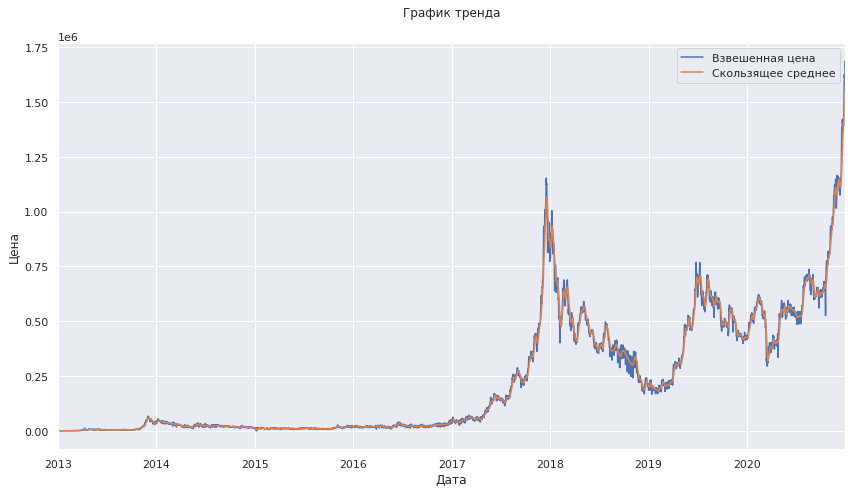

In [ ]:
decomposed.trend.plot(ax=plt.gca(),figsize=(12,6))
decomposed.trend.resample('1D').mean().rolling(7).mean().plot(ax=plt.gca(),figsize=(12,7))
plt.legend(['Взвешенная цена', 'Скользящее среднее'])
plt.title('График тренда', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.tight_layout()
print('Стандартное отклонение: ',decomposed.trend.std())

<a id="step_2.2"></a>
## Определим сезонность

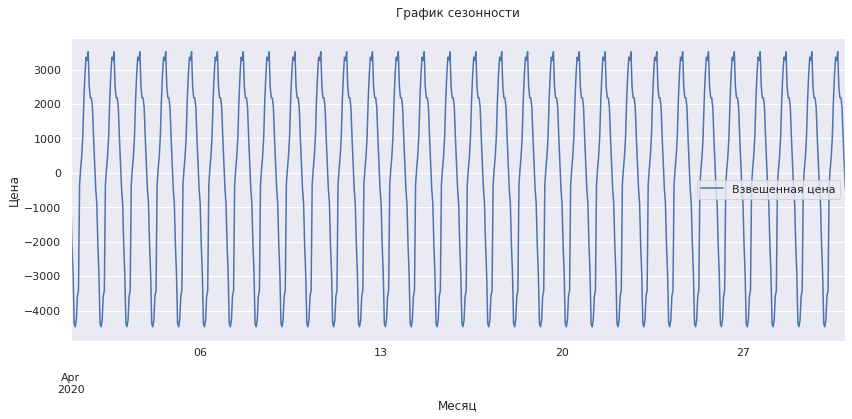

In [ ]:
decomposed.seasonal['2020-04':'2020-04'].plot(ax=plt.gca(),figsize=(12,6))
plt.legend(['Взвешенная цена'])
plt.title('График сезонности', y=1.05)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.tight_layout()

### Остаток декомпозиции

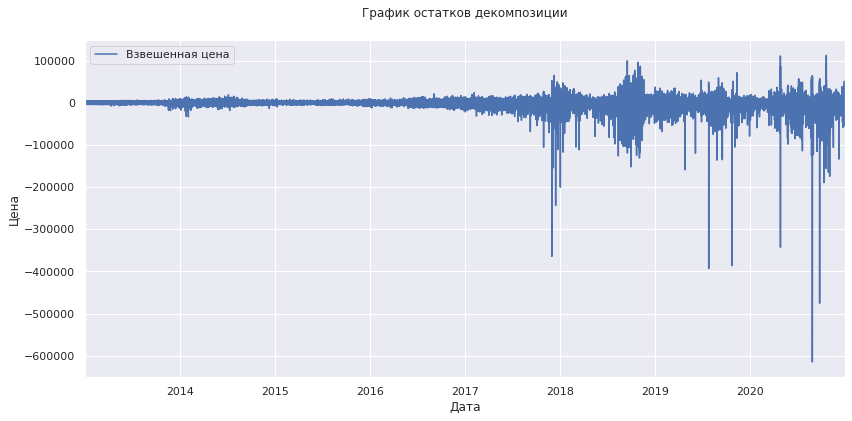

In [ ]:
decomposed.resid.plot(ax=plt.gca(),figsize=(12,6))
plt.legend(['Взвешенная цена'])
plt.title('График остатков декомпозиции', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.tight_layout()

### Для более качественного предсказания моделей оценим распределение даных

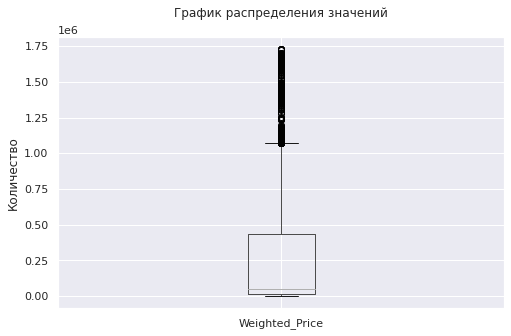

In [ ]:
plt.figure(figsize=(8,5))
data_res.boxplot('Weighted_Price')
plt.title('График распределения значений', y=1.05)
plt.ylabel('Количество')
plt.show()

## Создадим функцию для добавления в нашу выборку признаков и отстающего значения для удобства подбора параметров моделей

In [ ]:
data_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Datetime,,,,,,,,,
2013-01-01 03:00:00,1357009200,13.240000,13.240000,13.240000,13.240000,16.233261,214.928375,13.240000,2013.0
2013-01-01 09:00:00,1357030800,13.126667,13.126667,13.126667,13.126667,3.350000,43.958819,13.126667,2013.0
2013-01-01 11:00:00,1357038000,13.240000,13.240000,13.240000,13.240000,36.448640,482.580000,13.240000,2013.0
2013-01-01 12:00:00,1357041600,13.180000,13.180000,13.180000,13.180000,35.164669,461.824909,13.180000,2013.0
2013-01-01 15:00:00,1357052400,13.165000,13.165000,13.165000,13.165000,1.644318,21.635000,13.165000,2013.0
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1609441200,28193.870000,28216.910000,28171.240000,28196.360000,8.020000,226482.250000,28194.290000,2020.0
2020-12-31 20:00:00,1609444800,28193.870000,28216.910000,28171.240000,28196.360000,8.020000,226482.250000,28194.290000,2020.0
2020-12-31 21:00:00,1609448400,28193.870000,28216.910000,28171.240000,28196.360000,8.020000,226482.250000,28194.290000,2020.0


In [ ]:
def make_features(data, max_lag, rolling_mean_size):
    ##data['year'] = data.index.year
    #data['Month'] = data.index.month
    #data['Day'] = data.index.day
    data['Day_of_week'] = data.index.dayofweek
    data['Hour']= data.index.hour
    for lag in tqdm(range(1, max_lag + 1)):
        data['lagPrice_{}'.format(lag)] = data['Weighted_Price'].shift(lag)

    #for lag in tqdm(range(1, max_lag + 1)):
        #data['lagV(BTC)_{}'.format(lag)] = data['Volume_(BTC)'].shift(lag)
        
    #for lag in tqdm(range(1, max_lag + 1)):
        #data['lagV(Cur)_{}'.format(lag)] = data['Volume_(Currency)'].shift(lag)

    #for lag in tqdm(range(1, max_lag + 1)):
        #data['lagP(Open)_{}'.format(lag)] = data['Open'].shift(lag)
    #for lag in tqdm(range(1, max_lag + 1)):
        #data['lagP(Hight)_{}'.format(lag)] = data['High'].shift(lag)
    #for lag in tqdm(range(1, max_lag + 1)):
        #data['lagP(Low)_{}'.format(lag)] = data['Low'].shift(lag)
    #for lag in tqdm(range(1, max_lag + 1)):
     #   data['lagP(Close)_{}'.format(lag)] = data['Close'].shift(lag)

    data['Close_roll'] = data['Close'].shift(24).rolling(rolling_mean_size).mean() 
    data['rolling_price_mean'] = data['Weighted_Price'].shift(24).rolling(rolling_mean_size).mean()    
    data['rolling_vol_mean'] = data['Volume_(BTC)'].shift(24).rolling(rolling_mean_size).mean()
    data['rolling_cur_mean'] = data['Volume_(Currency)'].shift(24).rolling(rolling_mean_size).mean()

In [ ]:
make_features(data_test, 5, 5)

100%|██████████| 5/5 [00:00<00:00, 592.45it/s]


In [ ]:
data_test.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean
Datetime,,,,,,,,,,,,,,,,,,,,
2020-11-15 18:00:00,1605463200,16030.2,16036.0,16023.74,16030.03,3.52,56251.85,16030.1,2020.0,6,18,16030.1,16030.1,16030.1,16030.1,16030.1,15957.575502,15957.824185,5.909753,94037.590920
2020-11-15 19:00:00,1605466800,16030.2,16036.0,16023.74,16030.03,3.52,56251.85,16030.1,2020.0,6,19,16030.1,16030.1,16030.1,16030.1,16030.1,15933.605269,15933.918617,4.844730,76915.160691
2020-11-15 20:00:00,1605470400,16030.2,16036.0,16023.74,16030.03,3.52,56251.85,16030.1,2020.0,6,20,16030.1,16030.1,16030.1,16030.1,16030.1,15923.192936,15922.986038,5.181673,82290.389506
2020-11-15 21:00:00,1605474000,16030.2,16036.0,16023.74,16030.03,3.52,56251.85,16030.1,2020.0,6,21,16030.1,16030.1,16030.1,16030.1,16030.1,15932.026969,15931.948438,4.666947,74098.407426
2020-11-15 22:00:00,1605477600,16030.2,16036.0,16023.74,16030.03,3.52,56251.85,16030.1,2020.0,6,22,16030.1,16030.1,16030.1,16030.1,16030.1,15964.075369,15964.034721,2.136480,34115.788648


# Требуется удалить только нужные значения и не трогать features, при этом их требуется заполнить
#### Удалим столбцы ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)']

In [ ]:
data_test.dropna(axis=0, inplace=True)

In [ ]:
#data_test=data_test.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)'], axis=1)
#data_test

## Добавим секунды относительно суток для создания нелинейного отношения распределения по времения дня

In [ ]:
data_test['delta_sconds']= data_test['Hour']*60*60
seconds_in_day = 24*60*60

data_test['sin_time'] = np.sin(2*np.pi*data_test.delta_sconds/seconds_in_day)
data_test['cos_time'] = np.cos(2*np.pi*data_test.delta_sconds/seconds_in_day)

data_test.drop('delta_sconds', axis=1, inplace=True)

data_test.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time
Datetime,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,2,22,13.103333,13.134000,13.141111,13.113333,13.125000,13.190333,13.190333,18.568178,244.985421,-0.500000,0.866025
2013-01-02 23:00:00,1357167600,13.090000,13.090000,13.090000,13.090000,1.000000,13.090000,13.090000,2013.0,2,23,13.087143,13.103333,13.134000,13.141111,13.113333,13.184333,13.184333,16.300945,214.934428,-0.258819,0.965926
2013-01-03 00:00:00,1357171200,13.090000,13.090000,13.090000,13.090000,7.024647,91.952625,13.090000,2013.0,3,0,13.090000,13.087143,13.103333,13.134000,13.141111,13.187000,13.187000,16.581945,218.638804,0.000000,1.000000


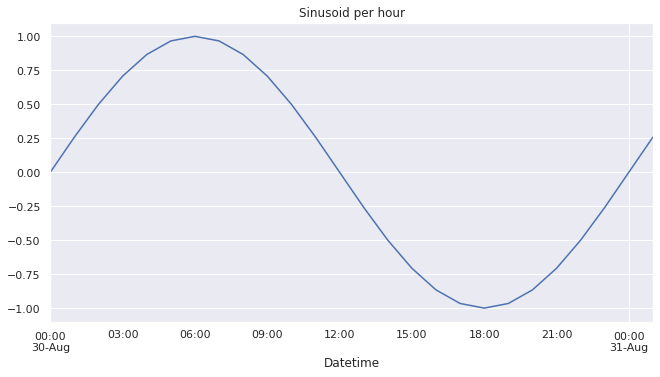

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10.8,5.5)})
plt.title('Sinusoid per hour')
data_test["2020-08-30 00:00:00":"2020-08-31 01:00:00"].sin_time.plot()
plt.show()

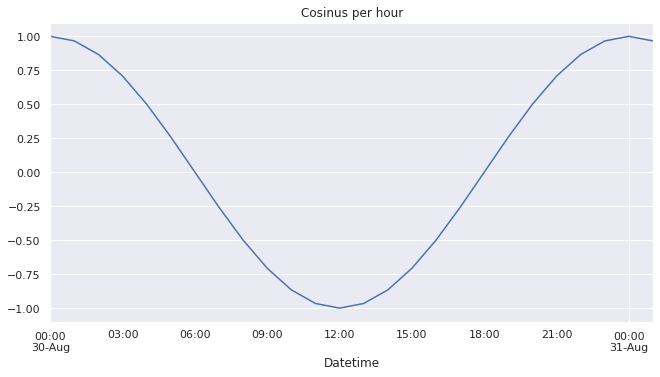

In [ ]:
data_test["2020-08-30 00:00:00":"2020-08-31 01:00:00"].cos_time.plot()
plt.title('Cosinus per hour')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


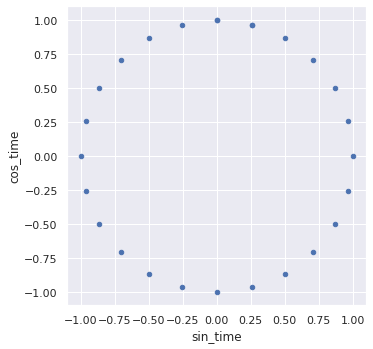

In [ ]:
data_test["2020-08-30 00:00:00":"2020-08-31 01:00:00"].plot.scatter('sin_time','cos_time').set_aspect('equal')

In [ ]:
data_test['delta_sconds']= data_test['Day_of_week']*24*60*60
seconds_in_day = 24*60*60*7

data_test['sin_time_week'] = np.sin(2*np.pi*data_test.delta_sconds/seconds_in_day)
data_test['cos_time_week'] = np.cos(2*np.pi*data_test.delta_sconds/seconds_in_day)

data_test.drop('delta_sconds', axis=1, inplace=True)

data_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week
Datetime,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,2,22,13.103333,13.134000,13.141111,13.113333,13.125000,13.190333,13.190333,18.568178,244.985421,-0.500000,8.660254e-01,0.974928,-0.222521
2013-01-02 23:00:00,1357167600,13.090000,13.090000,13.090000,13.090000,1.000000,13.090000,13.090000,2013.0,2,23,13.087143,13.103333,13.134000,13.141111,13.113333,13.184333,13.184333,16.300945,214.934428,-0.258819,9.659258e-01,0.974928,-0.222521
2013-01-03 00:00:00,1357171200,13.090000,13.090000,13.090000,13.090000,7.024647,91.952625,13.090000,2013.0,3,0,13.090000,13.087143,13.103333,13.134000,13.141111,13.187000,13.187000,16.581945,218.638804,0.000000,1.000000e+00,0.433884,-0.900969
2013-01-03 01:00:00,1357174800,13.156667,13.156667,13.156667,13.156667,2.599270,34.140845,13.156667,2013.0,3,1,13.090000,13.090000,13.087143,13.103333,13.134000,13.159000,13.162036,10.888569,143.059245,0.258819,9.659258e-01,0.433884,-0.900969
2013-01-03 04:00:00,1357185600,13.185000,13.185000,13.185000,13.185000,14.747826,194.458081,13.185000,2013.0,3,4,13.156667,13.090000,13.090000,13.087143,13.103333,13.141000,13.144036,4.883907,64.128749,0.866025,5.000000e-01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-15 18:00:00,1605463200,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0,6,18,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,15957.575502,15957.824185,5.909753,94037.590920,-1.000000,-1.836970e-16,-0.781831,0.623490
2020-11-15 19:00:00,1605466800,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0,6,19,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,15933.605269,15933.918617,4.844730,76915.160691,-0.965926,2.588190e-01,-0.781831,0.623490
2020-11-15 20:00:00,1605470400,16030.200000,16036.000000,16023.740000,16030.030000,3.520000,56251.850000,16030.100000,2020.0,6,20,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,15923.192936,15922.986038,5.181673,82290.389506,-0.866025,5.000000e-01,-0.781831,0.623490


In [ ]:
#sns.set_style('darkgrid')
#sns.set(rc={'figure.figsize':(10.8,5.5)})
plt.title('Sinusoid per hour')
data_test["2020-12-05 00:00:00":"2020-12-12 00:00:00"].sin_time_week.plot()
plt.show()

In [ ]:
data_test["2020-12-05 00:00:00":"2020-12-12 00:00:00"].cos_time_week.plot()
plt.title('Cosinus per hour')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


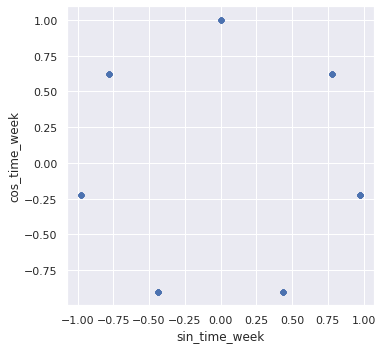

In [ ]:
data_test.sample(168).plot.scatter('sin_time_week','cos_time_week').set_aspect('equal')

----

In [ ]:
#data['delta_sconds']= data['Mins']*60*24
#seconds_in_day = 24*60*60

#data['sin_time'] = np.sin(2*np.pi*data.delta_sconds/seconds_in_day)
#data['cos_time'] = np.cos(2*np.pi*data.delta_sconds/seconds_in_day)

#data.drop('delta_sconds', axis=1, inplace=True)

#data

In [ ]:
#data['dayofweek'].unique()

In [ ]:
#data['delta_sconds_on_week']= 24*60*60*data['dayofweek']
#data

In [ ]:
#seconds_in_week= 24*60*60*7

#data['sin_time_week'] = np.sin(2*np.pi*data.delta_sconds_on_week/seconds_in_week)
#data['cos_time_week'] = np.cos(2*np.pi*data.delta_sconds_on_week/seconds_in_week)

#data.drop('delta_sconds_on_week', axis=1, inplace=True)

#data

In [ ]:
60*24*7

10080

In [ ]:
#sns.set_style('darkgrid')
#sns.set(rc={'figure.figsize':(10.8,5.5)})
#plt.title('Sinusoid per hour')
#data.sin_time[:61].plot()
#plt.show()

In [ ]:
#data.cos_time[:61].plot()
#plt.title('Cosinus per hour')
#plt.show()

In [ ]:
#data.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [ ]:
#data

In [ ]:
#data.dropna(axis=0, inplace=True)
#data= data.reset_index(drop=True)

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
graph=data_test.groupby(['Year','Month','Day'])['Volume_(BTC)','Close'].mean()
graph.plot(figsize=(15,8), grid=True)
plt.show()
sns.jointplot(x='Month', y="Close", data=graph, kind="reg")
plt.show()

----
----

## Функция для вывода графика распределения значений в зависимости от выбранного года

In [ ]:
def value_year(data,year):
  
  col=['Weighted_Price']
  table=data[data['Year']==year].copy()
  table.index = table.Month

  table[col].plot(figsize=(10,5))
  plt.title('Price {} year'.format(year))
  plt.show()

  table['Volume_(Currency)'].groupby('Month').sum().plot(kind='bar',figsize=(10,5),legend=True)
  plt.title('Volume {} year'.format(year))
  plt.show()


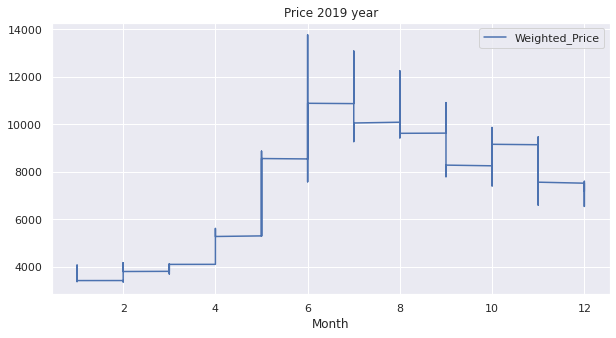

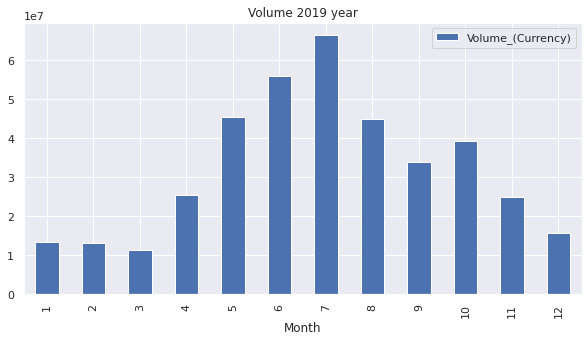

In [ ]:
value_year(data_test,2019)

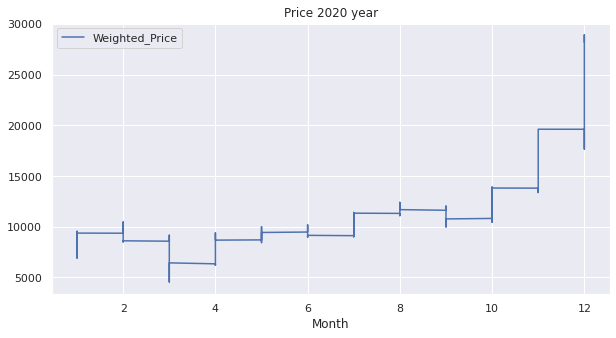

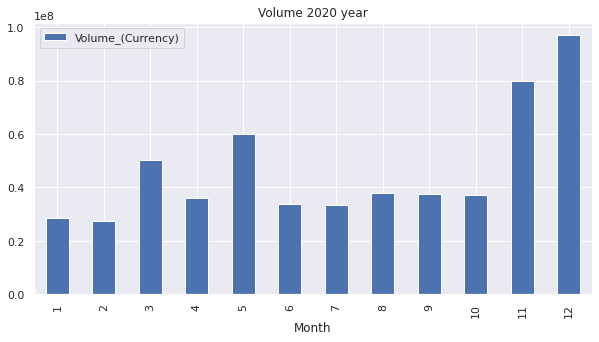

In [ ]:
value_year(data_test,2020)

----

## Добавим количество дней до халвинга

In [ ]:
import datetime
today=datetime.datetime.utcnow()
today

datetime.datetime(2021, 5, 7, 21, 20, 46, 499339)

In [ ]:
Расписание халвинга
Год 	Месяц (спрогнозированно)	Вознаграждение
2009	03.01.2009	50 BTC
2012	28.11.2012	25 BTC
2016	09.07.2016	12,5 BTC
2020	11.05.2020	6,25 BTC
2024	11.05.2024	3,125 BTC
2028	01.05.2028	1,56 BTC

In [ ]:
import datetime
HALVING12 = datetime.datetime.strptime('2012-11-28T00:00:00',"%Y-%m-%dT%H:%M:%S")
HALVING16 = datetime.datetime.strptime('2016-07-09T00:00:00',"%Y-%m-%dT%H:%M:%S")
HALVING20 = datetime.datetime.strptime('2020-05-11T00:00:00',"%Y-%m-%dT%H:%M:%S")
HALVING24 = datetime.datetime.strptime('2024-05-11T00:00:00',"%Y-%m-%dT%H:%M:%S")

In [ ]:
HALVING24

datetime.datetime(2024, 5, 11, 0, 0)

In [ ]:
tsh20 = data_test['2020-05-11']['Timestamp'].min()
tsh16 = data_test['2016-07-09']['Timestamp'].min()
tsh24 = data_test['Timestamp'].max()+107568000

In [ ]:
tsh24

1713045600

https://academy.binance.com/ru/halving

In [ ]:
data_test.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Month,Day,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,1,2,2,22,13.103333,13.134000,13.141111,13.113333,13.125000,13.190333,13.190333,18.568178,244.985421,-0.500000,0.866025,0.974928,-0.222521
2013-01-02 23:00:00,1357167600,13.090000,13.090000,13.090000,13.090000,1.000000,13.090000,13.090000,2013.0,1,2,2,23,13.087143,13.103333,13.134000,13.141111,13.113333,13.184333,13.184333,16.300945,214.934428,-0.258819,0.965926,0.974928,-0.222521
2013-01-03 00:00:00,1357171200,13.090000,13.090000,13.090000,13.090000,7.024647,91.952625,13.090000,2013.0,1,3,3,0,13.090000,13.087143,13.103333,13.134000,13.141111,13.187000,13.187000,16.581945,218.638804,0.000000,1.000000,0.433884,-0.900969
2013-01-03 01:00:00,1357174800,13.156667,13.156667,13.156667,13.156667,2.599270,34.140845,13.156667,2013.0,1,3,3,1,13.090000,13.090000,13.087143,13.103333,13.134000,13.159000,13.162036,10.888569,143.059245,0.258819,0.965926,0.433884,-0.900969
2013-01-03 04:00:00,1357185600,13.185000,13.185000,13.185000,13.185000,14.747826,194.458081,13.185000,2013.0,1,3,3,4,13.156667,13.090000,13.090000,13.087143,13.103333,13.141000,13.144036,4.883907,64.128749,0.866025,0.500000,0.433884,-0.900969


In [ ]:
import time
from tqdm import tqdm

In [ ]:
data_test.index[1]

Timestamp('2013-01-02 23:00:00')

In [ ]:
data_g = data_test[['Weighted_Price','Timestamp']].resample('1Y').max()
#data_g=data_g.reset_index()
data_g

,Weighted_Price,Timestamp
Datetime,,
2013-12-31,1159.810985,1388530800
2014-12-31,986.998368,1420066800
2015-12-31,493.734057,1451602800
2016-12-31,978.478481,1483225200
2017-12-31,19565.549694,1514761200
2018-12-31,17121.066640,1546297200
2019-12-31,13756.332326,1577833200
2020-12-31,16437.780198,1605477600


In [ ]:
data_g['Timestamp'] < tsh20

Datetime
2013-12-31     True
2014-12-31     True
2015-12-31     True
2016-12-31     True
2017-12-31     True
2018-12-31     True
2019-12-31     True
2020-12-31    False
Freq: A-DEC, Name: Timestamp, dtype: bool

In [ ]:
def additional_day_off(data1):
    for i in tqdm(data1['Timestamp']):
      if i <= tsh16:
        data1['day_to_halving16']=HALVING16-data1.index
      if tsh16 < i <= tsh20:
        data1['day_to_halving20']=HALVING20-data1.index
      if i > tsh20:
        data1['day_to_halving24']=HALVING24-data1.index

    return data1

In [ ]:
additional_day_off(data_g)

100%|██████████| 8/8 [00:00<00:00, 1194.28it/s]


,Weighted_Price,Timestamp,day_to_halving16,day_to_halving20,day_to_halving24
Datetime,,,,,
2013-12-31,1159.810985,1388530800,921 days,2323 days,3784 days
2014-12-31,986.998368,1420066800,556 days,1958 days,3419 days
2015-12-31,493.734057,1451602800,191 days,1593 days,3054 days
2016-12-31,978.478481,1483225200,-175 days,1227 days,2688 days
2017-12-31,19565.549694,1514761200,-540 days,862 days,2323 days
2018-12-31,17121.066640,1546297200,-905 days,497 days,1958 days
2019-12-31,13756.332326,1577833200,-1270 days,132 days,1593 days
2020-12-31,28909.166061,1609455600,-1636 days,-234 days,1227 days


In [ ]:
additional_day_off(data_test)[:5]

100%|██████████| 68758/68758 [01:22<00:00, 835.73it/s]


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week,day_to_halving16,day_to_halving20,day_to_halving24
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,2,22,13.103333,13.134000,13.141111,13.113333,13.125000,13.190333,13.190333,18.568178,244.985421,-0.500000,0.866025,0.974928,-0.222521,1283 days 02:00:00,2685 days 02:00:00,4146 days 02:00:00
2013-01-02 23:00:00,1357167600,13.090000,13.090000,13.090000,13.090000,1.000000,13.090000,13.090000,2013.0,2,23,13.087143,13.103333,13.134000,13.141111,13.113333,13.184333,13.184333,16.300945,214.934428,-0.258819,0.965926,0.974928,-0.222521,1283 days 01:00:00,2685 days 01:00:00,4146 days 01:00:00
2013-01-03 00:00:00,1357171200,13.090000,13.090000,13.090000,13.090000,7.024647,91.952625,13.090000,2013.0,3,0,13.090000,13.087143,13.103333,13.134000,13.141111,13.187000,13.187000,16.581945,218.638804,0.000000,1.000000,0.433884,-0.900969,1283 days 00:00:00,2685 days 00:00:00,4146 days 00:00:00
2013-01-03 01:00:00,1357174800,13.156667,13.156667,13.156667,13.156667,2.599270,34.140845,13.156667,2013.0,3,1,13.090000,13.090000,13.087143,13.103333,13.134000,13.159000,13.162036,10.888569,143.059245,0.258819,0.965926,0.433884,-0.900969,1282 days 23:00:00,2684 days 23:00:00,4145 days 23:00:00
2013-01-03 04:00:00,1357185600,13.185000,13.185000,13.185000,13.185000,14.747826,194.458081,13.185000,2013.0,3,4,13.156667,13.090000,13.090000,13.087143,13.103333,13.141000,13.144036,4.883907,64.128749,0.866025,0.500000,0.433884,-0.900969,1282 days 20:00:00,2684 days 20:00:00,4145 days 20:00:00


In [ ]:
data_test[['day_to_halving16','day_to_halving20','day_to_halving24']] = data_test[['day_to_halving16','day_to_halving20','day_to_halving24']].astype('timedelta64[h]')

In [ ]:
data_test.head(7)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week,day_to_halving16,day_to_halving20,day_to_halving24
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,2,22,13.103333,13.134000,13.141111,13.113333,13.125000,13.190333,13.190333,18.568178,244.985421,-0.500000,0.866025,0.974928,-0.222521,30794.0,64442.0,99506.0
2013-01-02 23:00:00,1357167600,13.090000,13.090000,13.090000,13.090000,1.000000,13.090000,13.090000,2013.0,2,23,13.087143,13.103333,13.134000,13.141111,13.113333,13.184333,13.184333,16.300945,214.934428,-0.258819,0.965926,0.974928,-0.222521,30793.0,64441.0,99505.0
2013-01-03 00:00:00,1357171200,13.090000,13.090000,13.090000,13.090000,7.024647,91.952625,13.090000,2013.0,3,0,13.090000,13.087143,13.103333,13.134000,13.141111,13.187000,13.187000,16.581945,218.638804,0.000000,1.000000,0.433884,-0.900969,30792.0,64440.0,99504.0
2013-01-03 01:00:00,1357174800,13.156667,13.156667,13.156667,13.156667,2.599270,34.140845,13.156667,2013.0,3,1,13.090000,13.090000,13.087143,13.103333,13.134000,13.159000,13.162036,10.888569,143.059245,0.258819,0.965926,0.433884,-0.900969,30791.0,64439.0,99503.0
2013-01-03 04:00:00,1357185600,13.185000,13.185000,13.185000,13.185000,14.747826,194.458081,13.185000,2013.0,3,4,13.156667,13.090000,13.090000,13.087143,13.103333,13.141000,13.144036,4.883907,64.128749,0.866025,0.500000,0.433884,-0.900969,30788.0,64436.0,99500.0
2013-01-03 07:00:00,1357196400,13.121429,13.121429,13.121429,13.121429,10.936355,143.392451,13.121429,2013.0,3,7,13.185000,13.156667,13.090000,13.090000,13.087143,13.093000,13.096038,21.015667,273.084411,0.965926,-0.258819,0.433884,-0.900969,30785.0,64433.0,99497.0
2013-01-03 08:00:00,1357200000,13.133000,13.133000,13.126000,13.126000,5.993963,78.710170,13.131372,2013.0,3,8,13.121429,13.185000,13.156667,13.090000,13.090000,13.090333,13.091082,24.412395,317.905417,0.866025,-0.500000,0.433884,-0.900969,30784.0,64432.0,99496.0


---
# Разделим выборки на тренировочную, валидационную и тестовую
----

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_test.drop(columns=['Open','High','Low','Close','Timestamp','Volume_(BTC)','Volume_(Currency)','Year','Hour'],axis=1, inplace=True)

In [ ]:
data_test.shape

(68758, 18)

In [ ]:
data_test[:1]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Day_of_week,Hour,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week,day_to_halving16,day_to_halving20,day_to_halving24
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02 22:00:00,1357164000,13.087143,13.087143,13.087143,13.087143,10.370603,135.417694,13.087143,2013.0,2,22,13.103333,13.134,13.141111,13.113333,13.125,13.190333,13.190333,18.568178,244.985421,-0.5,0.866025,0.974928,-0.222521,30794.0,64442.0,99506.0


In [ ]:
Xtest_data=data_test['2020-11-5' : '2020-11-15']
Xtest_p = Xtest_data.drop(columns=['Weighted_Price'], axis=1)
ytest_p = Xtest_data['Weighted_Price']

In [ ]:
Xtest_data.shape

(263, 18)

In [ ]:
Xmode = data_test['2016-01-01': '2020-11-04']
fetures = Xmode.drop(columns=['Weighted_Price'], axis=1)
target = Xmode['Weighted_Price']

In [ ]:
Xmode.shape

(42476, 18)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(fetures, target, test_size=0.25, random_state=42, shuffle=False)

In [ ]:
train_sample=X_train.shape[0]/fetures.shape[0]
test_sample=X_val.shape[0]/fetures.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_sample))
print('Размер тестовой выборки - {:.0%}'.format(test_sample))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


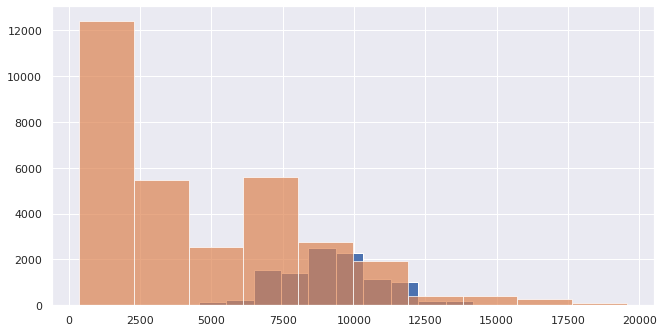

In [ ]:
y_val.hist()
y_train.hist(alpha=0.7)

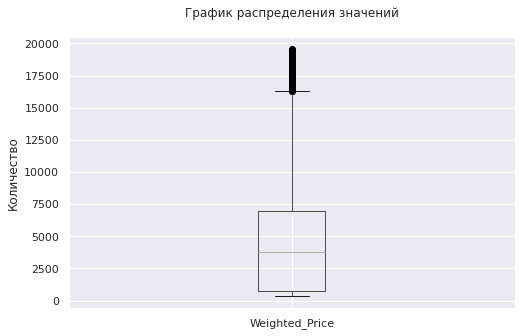

In [ ]:
plt.figure(figsize=(8,5))
y_train.to_frame().boxplot()
plt.title('График распределения значений', y=1.05)
plt.ylabel('Количество')
plt.show()

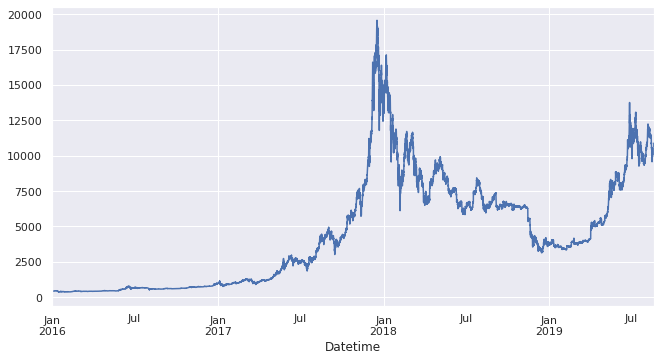

In [ ]:
y_train.plot()

<a id="step_3.2"></a>
## Для расчёта целевой метрики используем RMSE и MAE напишем функцию для её расчёта

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def rmse(test,predict):
    return ((mean_squared_error(test,predict))**0.5).round(2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


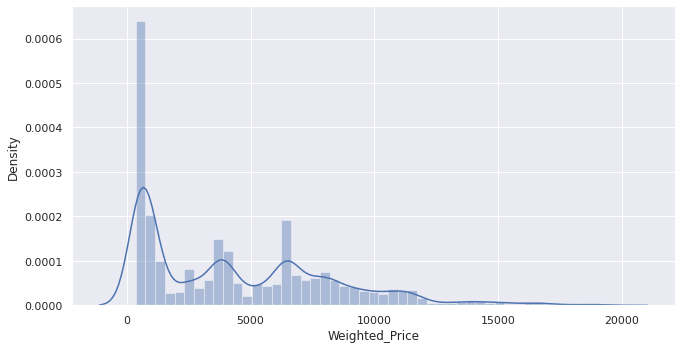

In [ ]:
sns.distplot(y_train)
plt.show()

<a id="step_3.3"></a>
## Создадим функцию, которая будет принимать на вход целевые и предсказанные значения, а возвращать абсолютное и среднеквадратичное отклонение на графиках с визуальным распределением разброса целевых признаков 

In [ ]:
def illustration_target(test,predict):
    rmse= mean_squared_error(test,predict)
    mae=mean_absolute_error(test,predict)
    
   
    plt.figure(figsize=(8, 8))
    plt.plot(predict,test,'o', alpha=0.5)
    plt.text(1950,200,'MAE={:.2f}'.format(mae))
    plt.text(1950,300,'RMSE={:.2f}'.format(rmse**0.5))
    plt.xlim(20,20000)
    plt.ylim(20,20000)
    plt.plot([0,20000],[0,20000],'--y', linewidth=2)
    plt.title('График отношения предсказанных значений к истинным значениям', y=1.05)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()

### Создадим функцию по выводу графика зависимости предсказанных от истинных значений и метрик качества предсказания

In [ ]:
def graph(name,y_test,predict):
    #rmse= mean_squared_error(y_test,predict)
    #mae=mean_absolute_error(y_test,predict)

    plt.figure(figsize=(8,8))
    sns.regplot(x=y_test, y=predict)
    #plt.text(14000,6500,'MAE={:.2f}'.format(mae))
    #plt.text(14000,6000,'RMSE={:.2f}'.format(rmse**0.5))
    plt.title('График распределения зависимости предсказанных от истинных значений', y=1.01)
    plt.ylabel('Предсказанные значения')
    plt.xlabel('Истинные значения')
    plt.show()

    print('Показание метрики MAE модели '+ name,': %.2f' % mean_absolute_error(y_test, predict))
    print('Показание метрики RMSE модели '+ name,': %.2f' % (mean_squared_error(y_test, predict))**0.5)
    print('Коэффициент детерминации  модели '+ name,': %.2f' % r2_score(y_test, predict))

<a id="step_3.5"></a>
## Проверим предсказания модели `RandomForestRegressor`

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import r2_score

In [ ]:
parametrs = { 'n_estimators': range (5, 18, 2),
              'max_depth': range (1, 5, 2)}
split_index = TimeSeriesSplit().split(X_train)
model_rf = RandomForestRegressor(random_state=12345)
grid_rf = GridSearchCV(model_rf, parametrs, cv=split_index, scoring=make_scorer(rmse, greater_is_better=False))
grid_rf.fit(X_train, y_train)

best_score_rf = -1*grid_rf.best_score_

parametrs_r_gs_d=pd.Series(grid_rf.best_params_)[0]
parametrs_r_gs_n=pd.Series(grid_rf.best_params_)[1]
print('Значение RMSE на обучающей выборке равно: {:.2f}'. format(best_score_rf), '\nМаксимальная глубина:',parametrs_r_gs_d, '\nКоличество деревьев:',parametrs_r_gs_n)

Значение RMSE на обучающей выборке равно: 822.47 
Максимальная глубина: 3 
Количество деревьев: 17


In [ ]:
predict_rf=grid_rf.predict(X_val)
predict_rf=predict_rf.round()

In [ ]:
rmse_rf=rmse(y_val, predict_rf)
print('RMSE модели Случайный лес равна:', rmse_rf)

RMSE модели Случайный лес равна: 1450.41


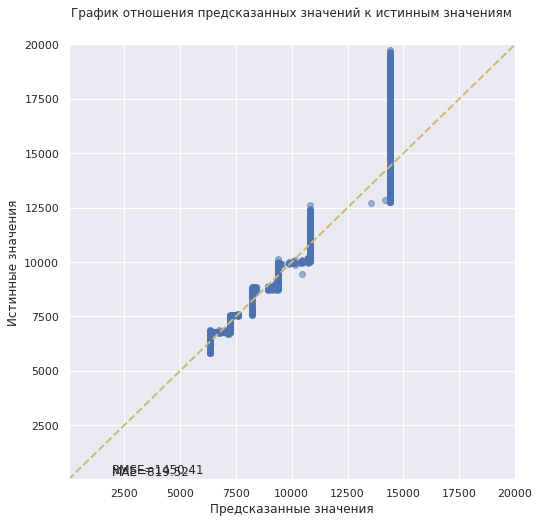

In [ ]:
rmse_rf = rmse(y_val,predict_rf)
mae_rf=mean_absolute_error(y_val, predict_rf)
illustration_target(y_val, predict_rf)

In [ ]:
graph('RandomForestRegressor',y_val,predict_rf)

Стандартное отклонение:  2635.6909785229705


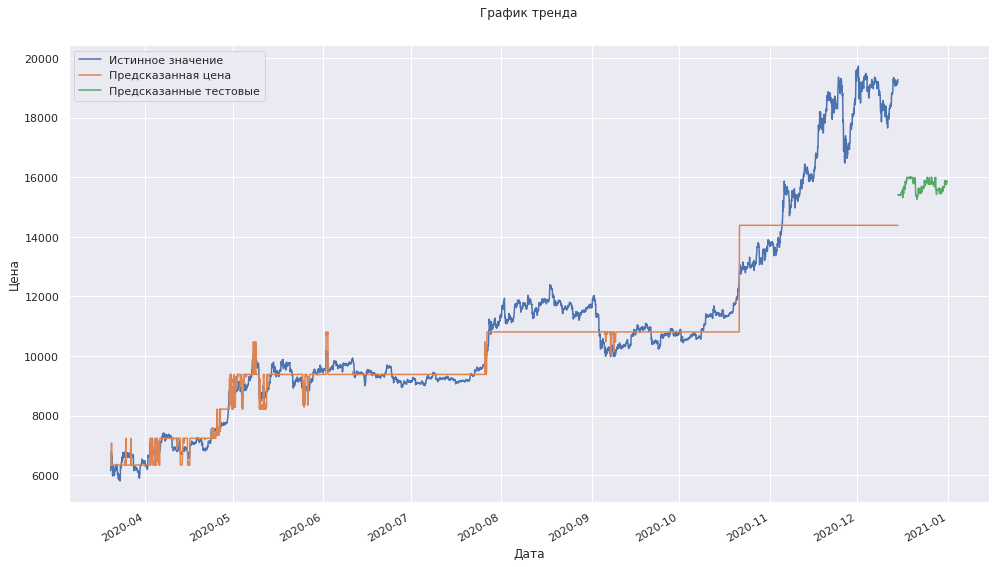

In [ ]:
y_val.plot(ax=plt.gca(),figsize=(14,8))
pd.Series(predict_rf, index=y_val.index).plot(ax=plt.gca(),figsize=(14,8))
pd.Series(predict_cat_t, index=ytest_p.index).plot(ax=plt.gca(),figsize=(14,8))
plt.legend(['Истинное значение', 'Предсказанная цена','Предсказанные тестовые'])
plt.title('График тренда', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.tight_layout()
print('Стандартное отклонение: ',predict_cat.std())

## Тестируем вторую модель `CatBoostRegressor`

###### Выполним установку модели `CatBoostRegressor`

In [ ]:
!pip3 install catboost 

     |████████████████████████████████| 67.3MB 104kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=1000, depth=2, loss_function="MAE", verbose=100)
model.fit(X_train,y_train, eval_set=(X_val,y_val))

0:	learn: 3093.3049730	test: 5325.1496500	best: 5325.1496500 (0)	total: 53ms	remaining: 53s
100:	learn: 279.0739334	test: 293.4701372	best: 293.4701372 (100)	total: 617ms	remaining: 5.49s
200:	learn: 81.1167971	test: 64.2356638	best: 64.2349386 (199)	total: 1.2s	remaining: 4.76s
300:	learn: 56.6644825	test: 63.6611568	best: 63.6611568 (300)	total: 1.79s	remaining: 4.15s
400:	learn: 51.4256351	test: 63.4515111	best: 63.4515111 (400)	total: 2.39s	remaining: 3.57s
500:	learn: 49.7383696	test: 62.0494749	best: 62.0494614 (499)	total: 3s	remaining: 2.99s
600:	learn: 48.8922845	test: 61.4170533	best: 61.3928332 (595)	total: 3.59s	remaining: 2.38s
700:	learn: 47.8942133	test: 60.3819135	best: 60.3819012 (699)	total: 4.2s	remaining: 1.79s
800:	learn: 47.0287989	test: 59.5088513	best: 59.5069298 (798)	total: 4.81s	remaining: 1.19s
900:	learn: 46.2308104	test: 59.2546848	best: 59.1857442 (893)	total: 5.43s	remaining: 596ms
999:	learn: 45.7362866	test: 58.8341537	best: 58.8222479 (988)	total: 6.0

### Посмотрим на график и данные метрик

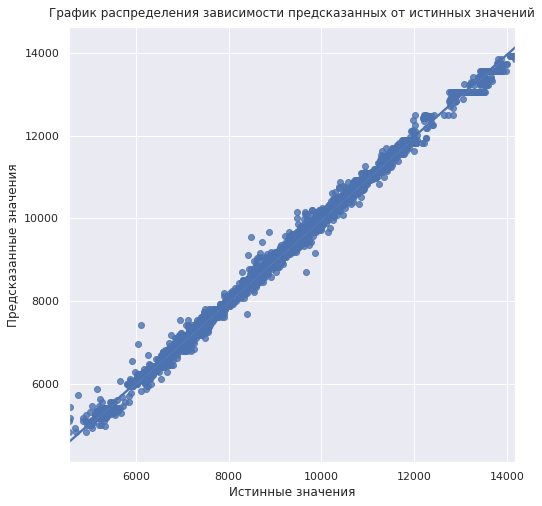

Показание метрики MAE модели CatBoostRegressor : 58.82
Показание метрики RMSE модели CatBoostRegressor : 88.87
Коэффициент детерминации  модели CatBoostRegressor : 1.00


In [ ]:
predict_cat=model.predict(X_val)
graph('CatBoostRegressor',y_val,predict_cat)

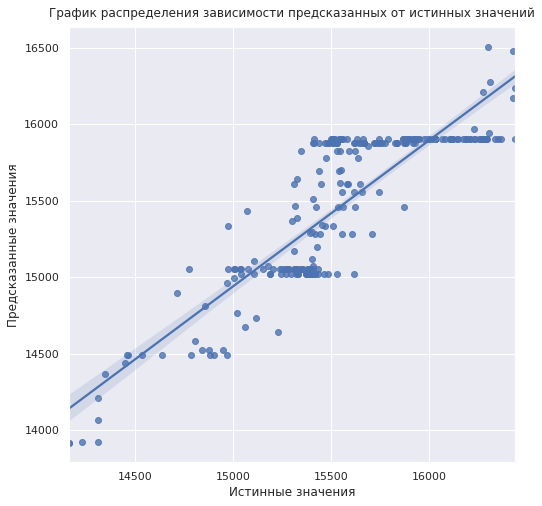

Показание метрики MAE модели CatBoostRegressor : 220.27
Показание метрики RMSE модели CatBoostRegressor : 260.18
Коэффициент детерминации  модели CatBoostRegressor : 0.70


In [ ]:
predict_cat_t=model.predict(Xtest_p)
graph('CatBoostRegressor',ytest_p,predict_cat_t)

In [ ]:
pd.Series(predict_cat, index=y_val.index)

Datetime
2020-03-20 03:00:00     6106.909493
2020-03-20 04:00:00     6079.829942
2020-03-20 05:00:00     6082.047991
2020-03-20 06:00:00     6040.204116
2020-03-20 07:00:00     6149.067503
                           ...     
2020-12-14 19:00:00    15355.499240
2020-12-14 20:00:00    15359.116620
2020-12-14 21:00:00    15353.889431
2020-12-14 22:00:00    15359.818351
2020-12-14 23:00:00    15362.095634
Length: 6473, dtype: float64

Стандартное отклонение:  1663.4905731672425


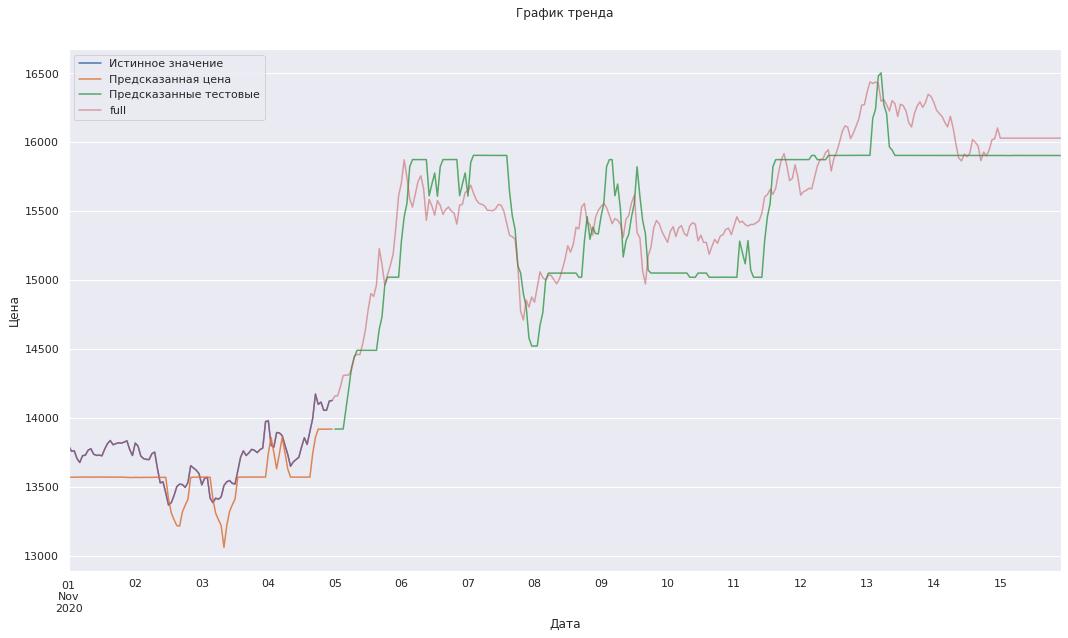

In [ ]:
y_val['2020-11-01':].plot(ax=plt.gca(),figsize=(14,8))

pd.Series(predict_cat, index=y_val.index)['2020-11-01':].plot(ax=plt.gca(),figsize=(14,8))
pd.Series(predict_cat_t, index=ytest_p.index)['2020-11-01':].plot(ax=plt.gca(),figsize=(14,8))
data_test['2020-11-01':]['Weighted_Price'].plot(ax=plt.gca(),figsize=(15,9), alpha=0.5)
plt.legend(['Истинное значение', 'Предсказанная цена','Предсказанные тестовые','full'])
plt.title('График тренда', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.tight_layout()
print('Стандартное отклонение: ',predict_cat.std())

Стандартное отклонение:  1663.4905731672425


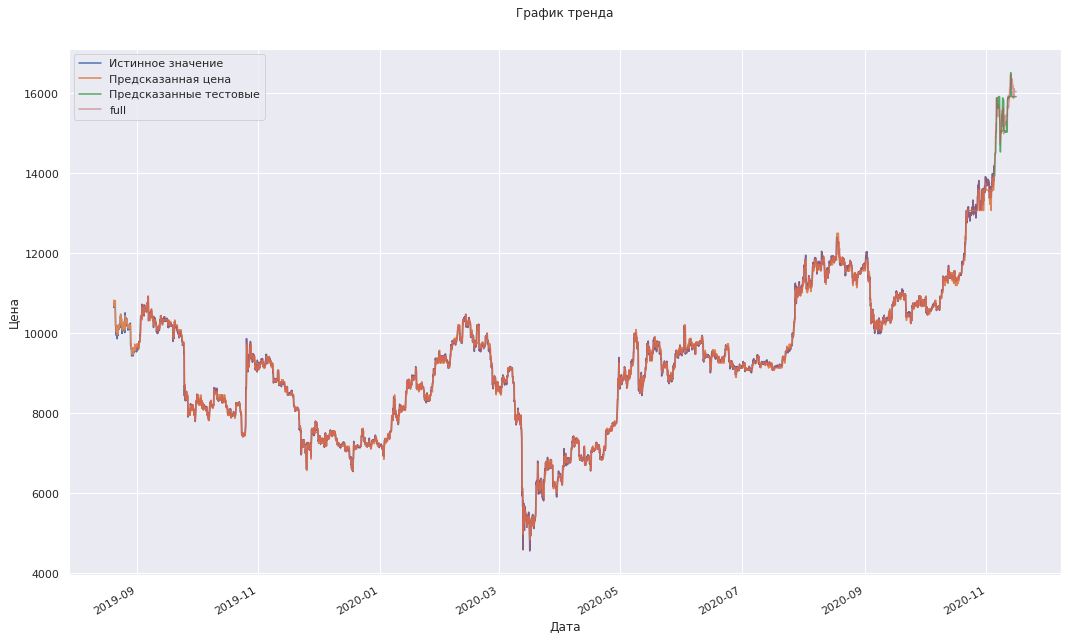

In [ ]:
y_val.plot(ax=plt.gca(),figsize=(14,8))
pd.Series(predict_cat, index=y_val.index).plot(ax=plt.gca(),figsize=(14,8))
pd.Series(predict_cat_t, index=ytest_p.index).plot(ax=plt.gca(),figsize=(14,8))
data_test['2019-09':'2020-12']['Weighted_Price'].plot(ax=plt.gca(),figsize=(15,9), alpha=0.5)
plt.legend(['Истинное значение', 'Предсказанная цена','Предсказанные тестовые','full'])
plt.title('График тренда', y=1.05)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.tight_layout()
print('Стандартное отклонение: ',predict_cat.std())

In [ ]:
data_test['2020-11-15':]

,Weighted_Price,Day_of_week,lagPrice_1,lagPrice_2,lagPrice_3,lagPrice_4,lagPrice_5,Close_roll,rolling_price_mean,rolling_vol_mean,rolling_cur_mean,sin_time,cos_time,sin_time_week,cos_time_week,day_to_halving16,day_to_halving20,day_to_halving24
Datetime,,,,,,,,,,,,,,,,,,
2020-11-15 00:00:00,16030.1,6,16104.418231,16027.040128,16018.384209,15944.800292,15900.601718,16302.754400,16302.922521,2.665799,43433.569505,0.000000e+00,1.000000e+00,-0.781831,0.62349,-38160.0,-4512.0,30552.0
2020-11-15 01:00:00,16030.1,6,16030.100000,16104.418231,16027.040128,16018.384209,15944.800292,16298.823255,16298.930556,2.193615,35749.728332,2.588190e-01,9.659258e-01,-0.781831,0.62349,-38161.0,-4513.0,30551.0
2020-11-15 02:00:00,16030.1,6,16030.100000,16030.100000,16104.418231,16027.040128,16018.384209,16282.822527,16283.132012,1.861408,30325.921090,5.000000e-01,8.660254e-01,-0.781831,0.62349,-38162.0,-4514.0,30550.0
2020-11-15 03:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16104.418231,16027.040128,16250.762493,16250.932713,1.739087,28265.377941,7.071068e-01,7.071068e-01,-0.781831,0.62349,-38163.0,-4515.0,30549.0
2020-11-15 04:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16030.100000,16104.418231,16212.764160,16213.221199,2.650222,42888.762073,8.660254e-01,5.000000e-01,-0.781831,0.62349,-38164.0,-4516.0,30548.0
2020-11-15 05:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,16177.133922,16177.378758,2.946274,47582.242335,9.659258e-01,2.588190e-01,-0.781831,0.62349,-38165.0,-4517.0,30547.0
2020-11-15 06:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,16167.932634,16168.274072,2.802381,45238.811392,1.000000e+00,-1.608123e-16,-0.781831,0.62349,-38166.0,-4518.0,30546.0
2020-11-15 07:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,16146.930150,16147.121536,3.078114,49655.056921,9.659258e-01,-2.588190e-01,-0.781831,0.62349,-38167.0,-4519.0,30545.0
2020-11-15 08:00:00,16030.1,6,16030.100000,16030.100000,16030.100000,16030.100000,16030.100000,16106.886316,16107.029248,4.255989,68331.952017,8.660254e-01,-5.000000e-01,-0.781831,0.62349,-38168.0,-4520.0,30544.0


In [ ]:
def importances(model,features):
    features=features.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(14, 8))
    plt.title('Важность функции')
    plt.barh(range(len(indices)), importances[indices], color='#6495ED', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Относительная важность')
    plt.show()
        
    feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)
    feat_importances = feat_importances.to_frame()
    feat_importances.columns=['Относительная важность']
    display(feat_importances)

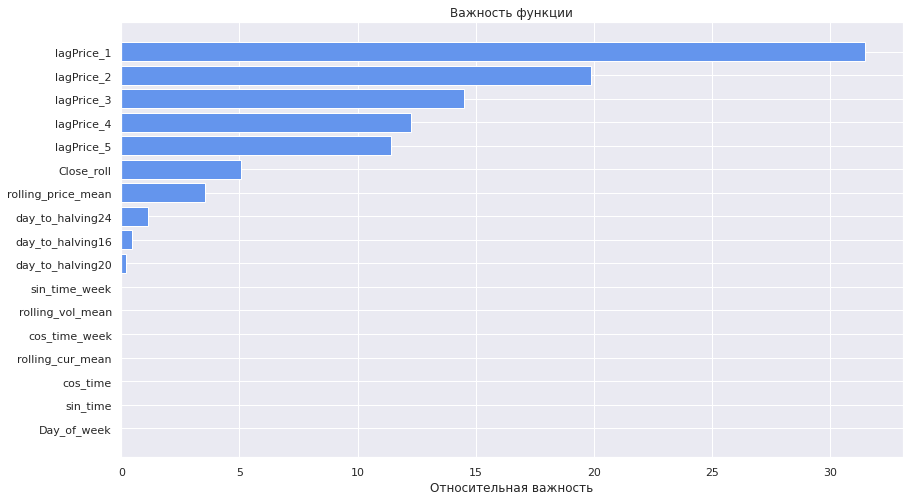

,Относительная важность
lagPrice_1,3.149974e+01
lagPrice_2,1.989613e+01
lagPrice_3,1.452931e+01
lagPrice_4,1.225923e+01
lagPrice_5,1.141324e+01
Close_roll,5.083726e+00
rolling_price_mean,3.560867e+00
day_to_halving24,1.124431e+00
day_to_halving16,4.463776e-01
day_to_halving20,1.809607e-01


In [ ]:
importances(model,X_val)